<a href="https://colab.research.google.com/github/Yair0/Aprendizaje_Maquina/blob/master/EDA_Pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src= "https://as.com/meristation/imagenes/2020/02/13/noticias/1581576624_508899_1581576871_noticia_normal.jpg"/>

Para su análisis, podemos basarnos en las siguientes notebooks:

## Pokemon: EDA with Plotly
https://www.kaggle.com/bryanb/pokemon-eda-with-plotly

## Basic EDA and clustering
https://www.kaggle.com/brunovr/basic-eda-and-clustering

La idea es realizar un análisis exploratorio de las estadísticas de los diferentes tipos de pokemon de las generaciones 1 a 8. Además el uso de algún modelo de aprendizaje para toma de decisiones.

In [ ]:
# Data analysis and wrangling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline

In [ ]:
pokedex = pd.read_csv("./sample_data/pokedex_updated.csv",  index_col=0)

In [ ]:
# Observar las 5 primeras entradas
pokedex.head(5)

,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,2,Overgrow,NaN,Chlorophyll,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,70.0,64.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,2,Overgrow,NaN,Chlorophyll,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,70.0,142.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,70.0,236.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,1,Thick Fat,NaN,NaN,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,70.0,281.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,NaN,0.6,8.5,2,Blaze,NaN,Solar Power,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,70.0,62.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [ ]:
# Ver la información de las columnas/dimensiones
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1028 entries, 0 to 1027
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pokedex_number    1028 non-null   int64  
 1   name              1028 non-null   object 
 2   german_name       938 non-null    object 
 3   japanese_name     938 non-null    object 
 4   generation        1028 non-null   int64  
 5   status            1028 non-null   object 
 6   species           1028 non-null   object 
 7   type_number       1028 non-null   int64  
 8   type_1            1028 non-null   object 
 9   type_2            542 non-null    object 
 10  height_m          1028 non-null   float64
 11  weight_kg         1027 non-null   float64
 12  abilities_number  1028 non-null   int64  
 13  ability_1         1025 non-null   object 
 14  ability_2         513 non-null    object 
 15  ability_hidden    810 non-null    object 
 16  total_points      1028 non-null   float64


In [ ]:
# Ver cuantos valores faltantes hay en el dataset
null_filter = pokedex.isna().sum()
missing_values = null_filter.loc[pokedex.isna().sum() != 0].to_frame().copy()
missing_values

,0
german_name,90
japanese_name,90
type_2,486
weight_kg,1
ability_1,3
ability_2,515
ability_hidden,218
catch_rate,104
base_friendship,104
base_experience,104


In [ ]:
# ¿Cuántos tipos de Pokemon (type) hay en el dataset, y cuáles son?
unique = pokedex.type_1.unique()
print(f"Hay {unique.size}, y son: {unique}")

Hay 18, y son: ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Dark' 'Poison' 'Electric' 'Ground'
 'Ice' 'Fairy' 'Steel' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Dragon'
 'Flying']


In [ ]:
# Lista de pokemon 'normales'
pokedex_norm = pokedex[pokedex['status']=='Normal']
pokedex_norm.reset_index
pokedex_norm.head()

,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,2,Overgrow,NaN,Chlorophyll,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,70.0,64.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,2,Overgrow,NaN,Chlorophyll,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,70.0,142.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,70.0,236.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,1,Thick Fat,NaN,NaN,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,70.0,281.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,NaN,0.6,8.5,2,Blaze,NaN,Solar Power,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,70.0,62.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [ ]:
# Lista de pokemon 'no-normales' (legendarios, sublegendarios y míticos)
pokedex_leg = pokedex[pokedex['status']!='Normal']
pokedex_leg.reset_index
pokedex_leg.head()

,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
182,144,Articuno,Arktos,フリーザー (Freezer),1,Sub Legendary,Freeze Pokémon,2,Ice,Flying,1.7,55.4,2,Pressure,NaN,Snow Cloak,580.0,90.0,85.0,100.0,95.0,125.0,85.0,3.0,35.0,261.0,Slow,1,Undiscovered,NaN,NaN,80.0,1.0,2.0,1.0,2.0,0.50,1.0,1.0,1.0,0.0,1.0,1.0,0.50,4.0,1.0,1.0,1.0,2.0,1.0
183,145,Zapdos,Zapdos,サンダー (Thunder),1,Sub Legendary,Electric Pokémon,2,Electric,Flying,1.6,52.6,2,Pressure,NaN,Static,580.0,90.0,90.0,85.0,125.0,90.0,100.0,3.0,35.0,261.0,Slow,1,Undiscovered,NaN,NaN,80.0,1.0,1.0,1.0,1.0,0.50,2.0,0.5,1.0,0.0,0.5,1.0,0.50,2.0,1.0,1.0,1.0,0.5,1.0
184,146,Moltres,Lavados,ファイヤー (Fire),1,Sub Legendary,Flame Pokémon,2,Fire,Flying,2.0,60.0,2,Pressure,NaN,Flame Body,580.0,90.0,100.0,90.0,125.0,85.0,90.0,3.0,35.0,261.0,Slow,1,Undiscovered,NaN,NaN,80.0,1.0,0.5,2.0,2.0,0.25,1.0,0.5,1.0,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
188,150,Mewtwo,Mewtu,ミュウツー (Mewtwo),1,Legendary,Genetic Pokémon,1,Psychic,NaN,2.0,122.0,2,Pressure,NaN,Unnerve,680.0,106.0,110.0,90.0,154.0,90.0,130.0,3.0,0.0,306.0,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,1.0,1.0,1.0,1.00,1.0,0.5,1.0,1.0,1.0,0.5,2.00,1.0,2.0,1.0,2.0,1.0,1.0
189,150,Mega Mewtwo X,Mewtu,ミュウツー (Mewtwo),1,Legendary,Genetic Pokémon,2,Psychic,Fighting,2.3,127.0,1,Steadfast,NaN,NaN,780.0,106.0,190.0,100.0,154.0,100.0,130.0,3.0,0.0,351.0,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,1.0,1.0,1.0,1.00,1.0,0.5,1.0,1.0,2.0,1.0,1.00,0.5,2.0,1.0,1.0,1.0,2.0


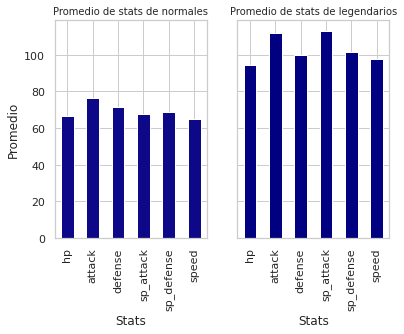

In [ ]:
# Comparar el promedio de los stats entre los Pokémon normales y los legendarios/míticos/sublegendarios

fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True)
ax.set_title('Promedio de stats de normales', fontsize=10) 
ax2.set_title('Promedio de stats de legendarios', fontsize=10)
ax.set_xlabel('Stats')
ax2.set_xlabel('Stats')
ax.set_ylabel('Promedio')
ax2.set_ylabel('Promedio')

# Promedio de los stats en pokemon 'normales'
pokedex_norm.iloc[:, 17:23].mean(axis=0).plot(kind='bar', ax=ax, colormap='plasma')

# Promedio de los stats en pokemon 'legendarios'
pokedex_leg.iloc[:, 17:23].mean(axis=0).plot(kind='bar', ax=ax2, colormap='jet')

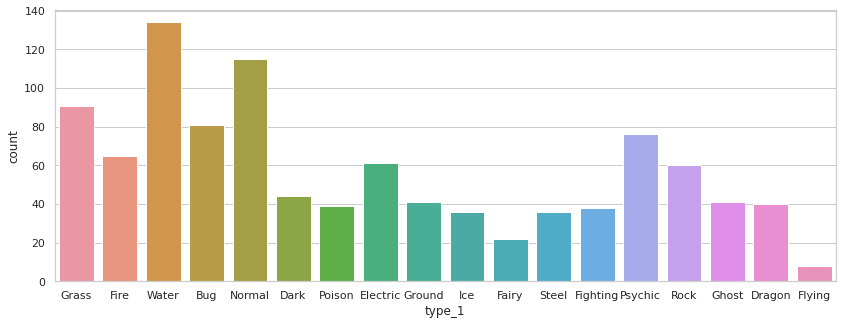

In [ ]:
# Conteo del tipo de pokemon (basados en la columna type_1, el tipo principal)
plt.figure(figsize=(14,5))
sns.countplot(x=pokedex['type_1'])

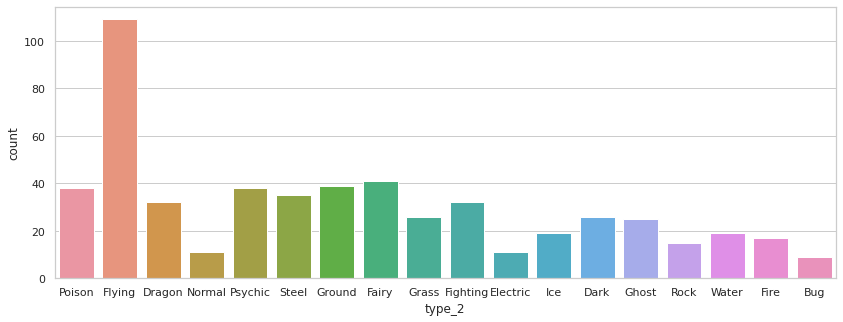

In [ ]:
# Conteo del tipo de pokemon (basados en la columna type_2, el tipo secundario)
plt.figure(figsize=(14,5))
sns.countplot(x=pokedex['type_2'])

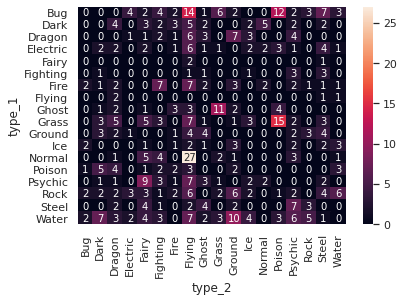

In [ ]:
# Heatmap para ver el conteo del mayor doble-tipo en los Pokémon
sns.heatmap(pd.crosstab(pokedex.type_1,pokedex.type_2),annot=True, linecolor='white')

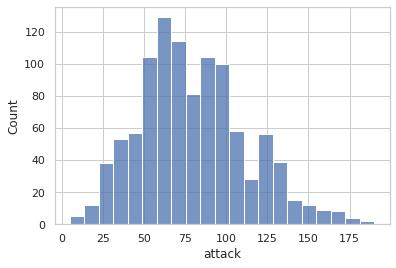

In [ ]:
# Histograma de la distribución del ataque (o cualquier otro stat) de los Pokémon
sns.histplot(pokedex.attack) # El stat se puede cambiar

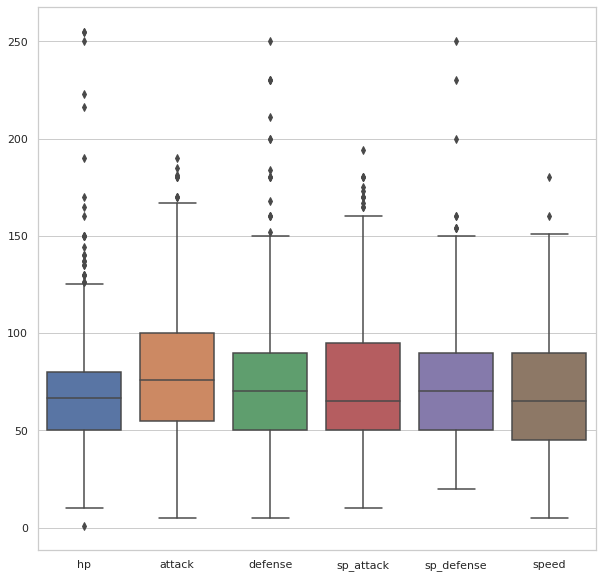

In [ ]:
# Usar boxplots para un análisis más visual de los stats de todos los Pokémon
pokedex_stats = pokedex.iloc[:, 17:23]
plt.figure(figsize=(10,10))
sns.boxplot(data=pokedex_stats)

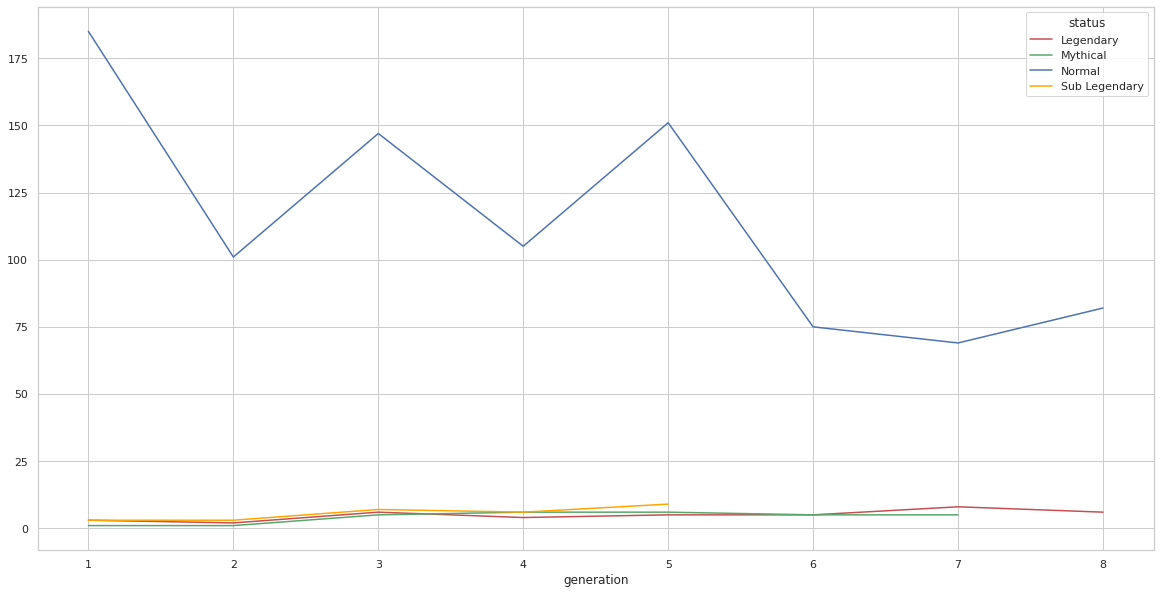

In [ ]:
# ¿Con cuántos tipos de pokemon (normales, legendarios, míticos y sublegendarios) contribuye cada generación a la pokedex nacional?
poke_gens = pokedex.groupby(['generation', 'status']).count().reset_index()
poke_gens = poke_gens[['generation', 'status', 'total_points']]
poke_gens = poke_gens.pivot('generation', 'status', 'total_points')
poke_gens.plot(figsize=(20,10), color=['r','g','b', 'orange'])

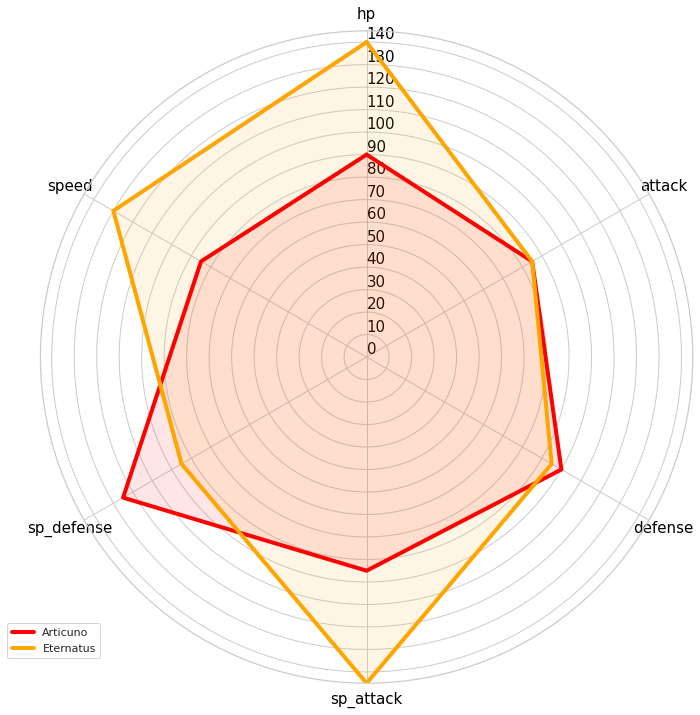

In [ ]:
# ¿Cómo se pueden comparar (de forma visual y dinámica) los stats de un Pokémon con otro?

import math

# Conseguir los rows del df que matcheen con los nombres de los pokes
poke1_name = 'Articuno' # ---- NOTA: Este valor se puede cambiar
poke1 = pokedex[pokedex['name'] == poke1_name]
poke2_name = 'Eternatus' # ---- NOTA: Este valor se puede cambiar
poke2 = pokedex[pokedex['name'] == poke2_name]

# Comparar los stats de dos Pokémon en una gráfica de estrella
poke1_id = poke1.index[0]
poke2_id = poke2.index[0]
poke1 = pokedex.loc[poke1_id]
poke2 = pokedex.loc[poke2_id]

df = pd.DataFrame({
    'hp': [poke1['hp'],poke2['hp']],
    'attack': [poke1['attack'],poke2['attack']],
    'defense': [poke1['defense'],poke2['defense']],
    'sp_attack': [poke1['sp_attack'],poke2['sp_attack']],
    'sp_defense': [poke1['sp_defense'],poke2['sp_defense']],
    'speed': [poke1['speed'],poke2['speed']]
})

maximum=max([poke1['hp'],poke2['hp'],
             poke1['attack'],poke2['attack'],
             poke1['defense'],poke2['defense'],
             poke1['sp_attack'],poke2['sp_attack'],
             poke1['sp_defense'],poke2['sp_defense'],
             poke1['speed'],poke2['speed']])

categories=['hp', 'attack', 'defense', 'sp_attack',
       'sp_defense', 'speed']

aa=[]
aaa=[]
for i in range(int(maximum)):
    aa.append(i*10)
    aaa.append(str(i*10))

# Definir los angulos de cada plot en la gráfica de estrella
angles = [n / float(len(categories)) * 2 * math.pi for n in range(len(categories))]
angles += angles[:1]
 
# ::: Inicializar y configurar la gráfica de esstrella
fig = plt.figure(figsize=(12,12))

ax = plt.subplot(111, polar=True)
 
ax.set_theta_offset(math.pi / 2)
ax.set_theta_direction(-1)

plt.xticks(angles[:-1], categories,size=15,color="black")# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks(aa, aaa, color="black", size=15)
plt.ylim(0,maximum)

ax.set_rlabel_position(0)
plt.yticks(aa, aaa, color="black", size=15)
plt.ylim(0,maximum)

# ::: PARTE 2: Añadir los plots a la gráfica estrella
 
# Para el poke_1
values=df.loc[0].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=4, linestyle='solid',color='red',label=poke1['name'])
ax.fill(angles, values, 'red', alpha=0.1)
 
# para el poke_2
values=df.loc[1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=4, linestyle='solid',color='orange',label=poke2['name'])
ax.fill(angles, values, 'orange', alpha=0.1)

# Añadir los nombres de los Pokémon como leyenda
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

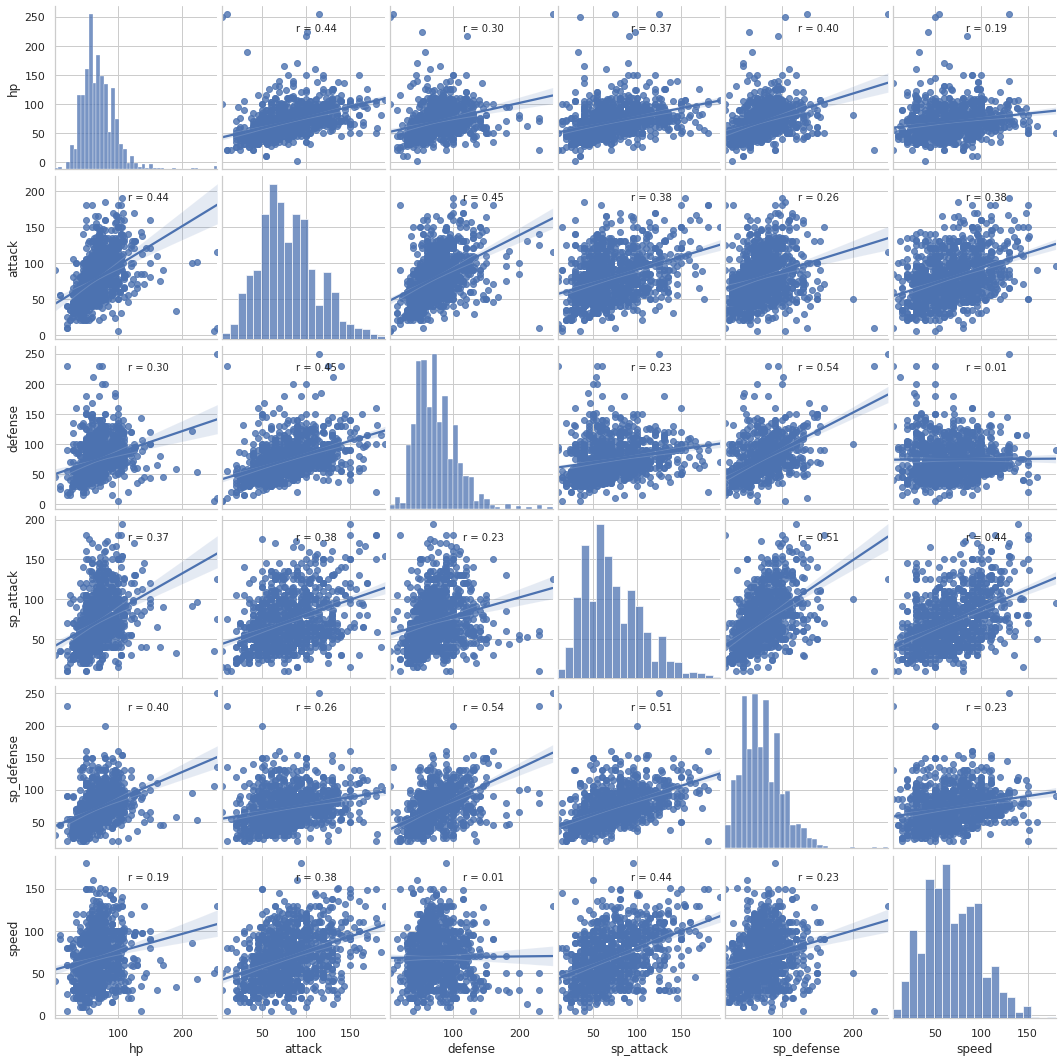

In [ ]:
from scipy.stats.stats import pearsonr

# Función y gráfica para mostrar la correlación entre variables de los stats
# usando el coeficiente de correlación de Pearson

# Esto nos ayuda a ver si el dataset es apto para usar un modelo de ML
# de regresión lineal

def show_corr(x, y, **kwargs):
    (r, _) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(
        'r = {:.2f}'.format(r),
        xy=(0.45, 0.85),
        xycoords=ax.transAxes
    )

sns.pairplot(
    data=pokedex.iloc[:, 17:23],
    kind='reg'
).map_offdiag(show_corr);

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz


from io import StringIO
#from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from mlxtend.plotting import plot_decision_regions
from IPython.display import Image

def make_decision_tree(max_depth, data_copy,target):
    # trenowanie modelu
    classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    classifier.fit(data_copyb, target)

    # eksport grafu drzewa
    dot_data = StringIO()
    export_graphviz(classifier,
                   out_file=dot_data,
                   
                   
                   special_characters=True,
                   rounded=True,
                   filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('graph.png')
    
    acc = classifier.score(data_copy, target) 

    colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'
    plt.figure(figsize=(12, 8))
    ax = plot_decision_regions(data_copyb, target, classifier, legend=0, colors=colors)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, cats, framealpha=0.3)
    plt.xlabel('percentage_male')
    plt.ylabel('egg_cycles')
    plt.title(f'DT: max_depth={max_depth}, accuracy={acc * 100:.2f}')

    return Image(graph.create_png(), width=200 + max_depth * 120)


In [ ]:
def create_np_array_from_input_list(input_list,output_type):
    np_target = []
    
    entries = []
    entries_idx = []
    for entry in input_list:
        duplicate = 0
        for active_entry in entries:
            if entry == active_entry:
                duplicate = 1
        
        if duplicate == 0:
            entries.append(entry)
        
        no_entries = len(entries)
        
    for i in range(0,no_entries):
        entries_idx.append(i)
        
    for entry in input_list:
        for i in range(0,no_entries):
            if entry == entries[i]:
                np_target.append(entries_idx[i])
                
    if output_type == 'numpy':
        return(np_target)
    elif output_type == 'categories':
        return(entries)
    else:
        raise ValueError('output_type must be \'numpy\' or \'categories\'')

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


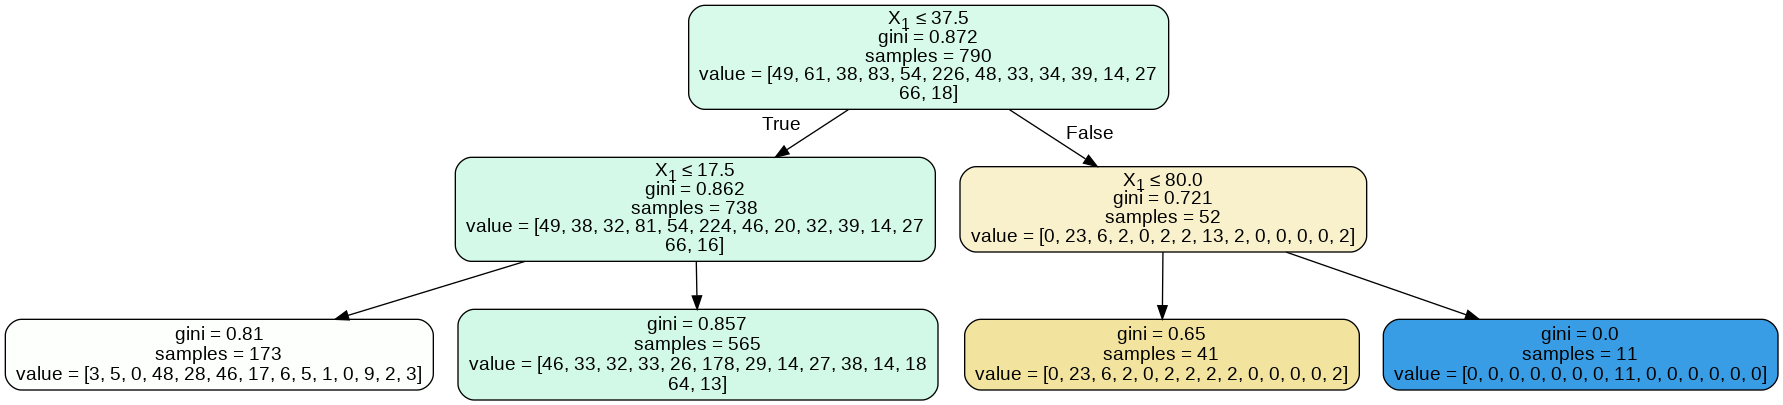

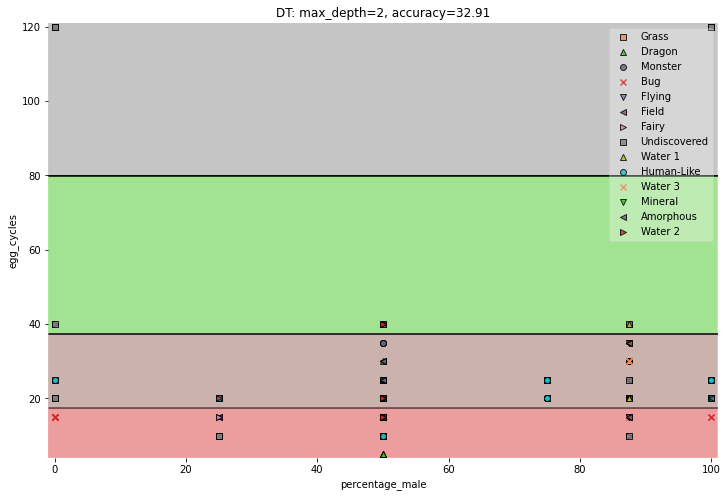

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

pokedex = pd.read_csv("./sample_data/pokedex_updated.csv",  index_col=0)
raw = pokedex.copy()
raw.dropna(axis=0, subset=['egg_type_1'], inplace=True)
raw.dropna(axis=0, subset=['percentage_male'], inplace=True)
raw.dropna(axis=0, subset=['egg_cycles'], inplace=True)
raw.dropna(axis=0, subset=['growth_rate'], inplace=True)
raw.reset_index()
data=raw[[ 'egg_type_1','percentage_male','egg_cycles' ,'growth_rate' ,'type_number']]
data = data.reset_index()

np_data = create_np_array_from_input_list(data['egg_type_1'],'numpy')
cats = create_np_array_from_input_list(data['egg_type_1'],'categories')

data = data.reset_index()

data_copy = data.copy()


for i in range(0,len(np_data)):
    data_copy.at[i,'egg_type_1'] = np_data[i]

for i in range(0,len(np_data)):
    data_copy.at[i,'growth_rate'] = np_data[i]

for  col in ['egg_type_1', 'growth_rate']:
  data_copy[col]=data_copy[col].astype('int')

max_depth=2
target = data_copy['egg_type_1']
data_copyb = data_copy[['percentage_male','egg_cycles']].to_numpy()
data_copy.corr()
targetb=target.to_numpy()
make_decision_tree(max_depth, data_copyb,targetb)


Index(['pokedex_number', 'name', 'german_name', 'japanese_name', 'generation',
       'status', 'species', 'type_number', 'type_1', 'type_2', 'height_m',
       'weight_kg', 'abilities_number', 'ability_1', 'ability_2',
       'ability_hidden', 'total_points', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'catch_rate', 'base_friendship',
       'base_experience', 'growth_rate', 'egg_type_number', 'egg_type_1',
       'egg_type_2', 'percentage_male', 'egg_cycles', 'against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fight', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
       'against_fairy'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


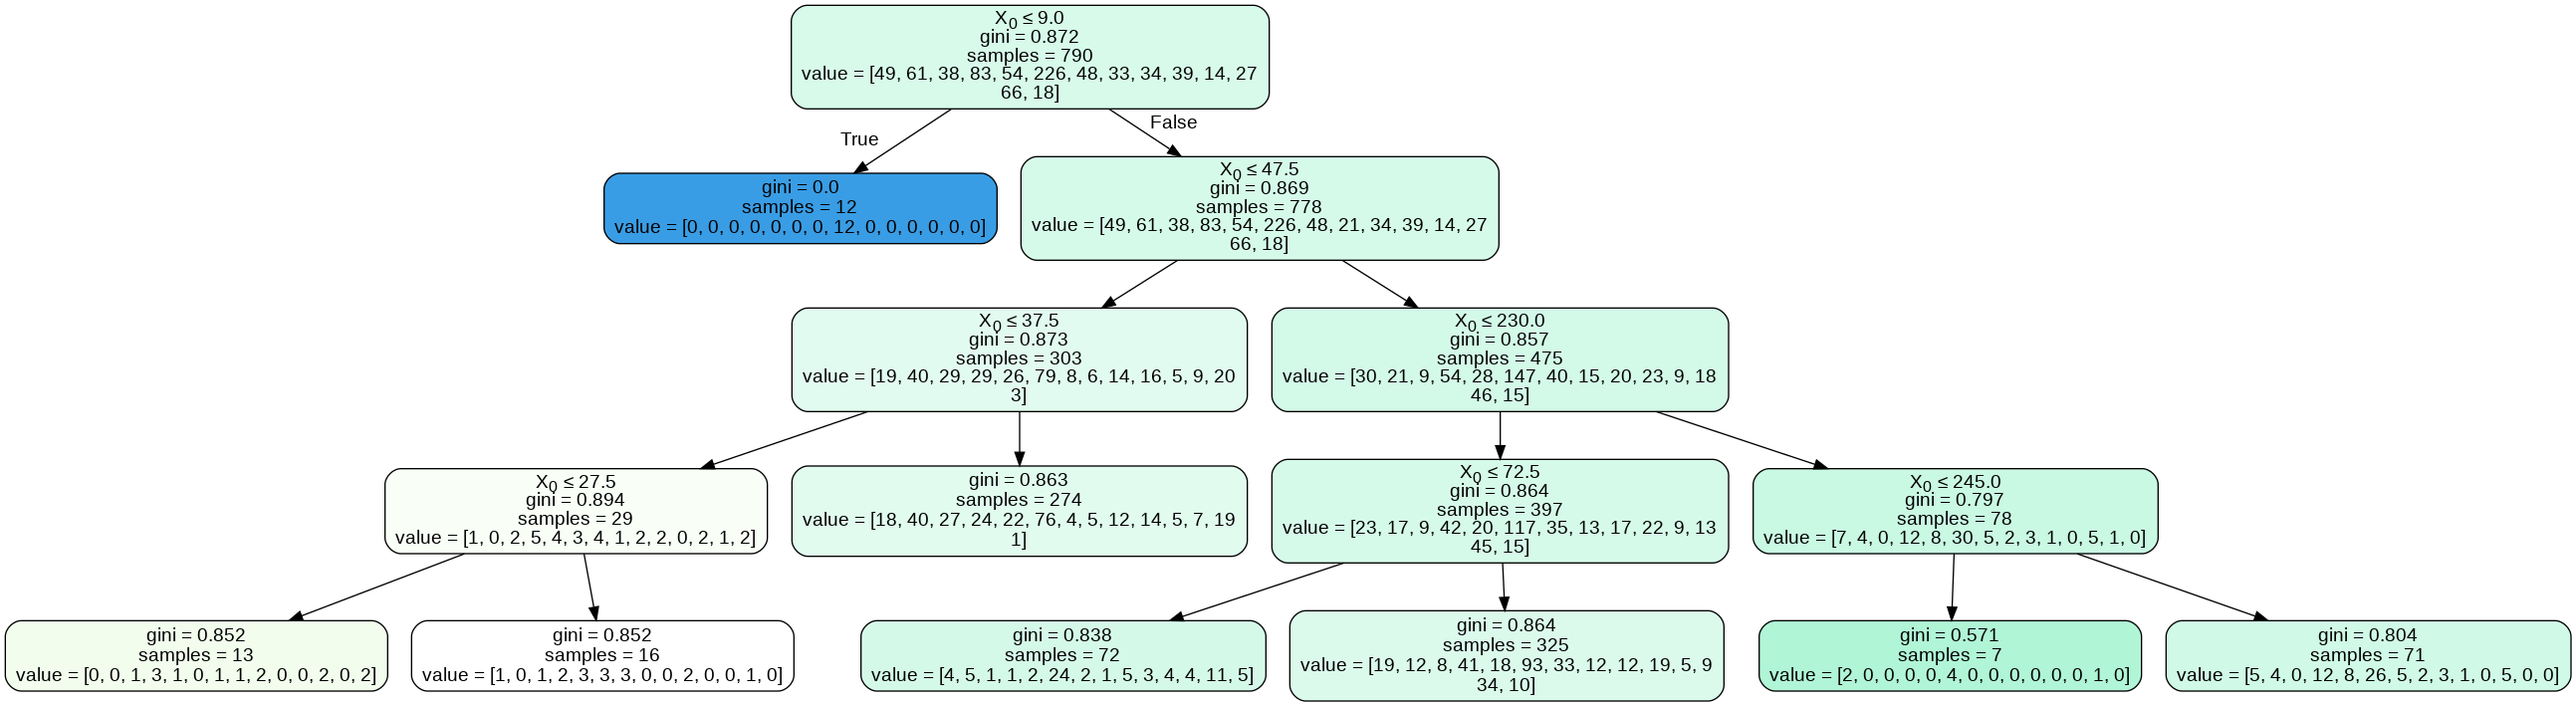

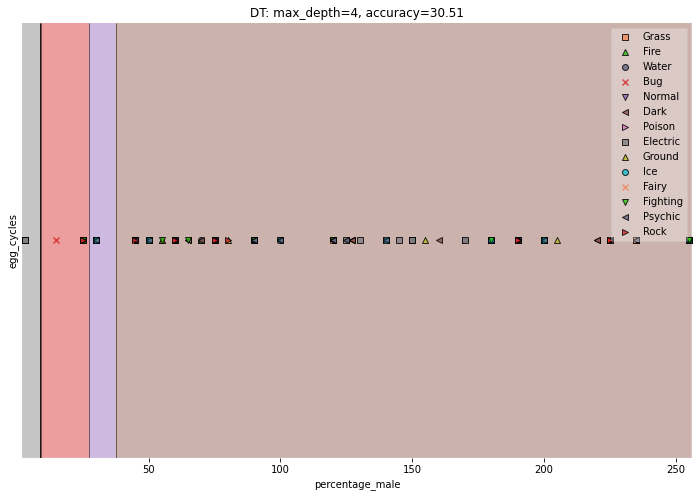

In [ ]:
pokedex = pd.read_csv("./sample_data/pokedex_updated.csv",  index_col=0)
raw = pokedex.copy()
raw.dropna(axis=0, subset=['egg_type_1'], inplace=True)
raw.dropna(axis=0, subset=['percentage_male'], inplace=True)
raw.dropna(axis=0, subset=['egg_cycles'], inplace=True)
raw.dropna(axis=0, subset=['growth_rate'], inplace=True)
raw.reset_index()
data = raw[['growth_rate', 'type_1', 'total_points', 'catch_rate']]
print(raw.keys())
np_data = create_np_array_from_input_list(data['type_1'],'numpy')
cats = create_np_array_from_input_list(data['type_1'],'categories')
data = data.reset_index()
data_copy = data.copy()
#data.loc['base_friendship']

for i in range(0,len(np_data)):
    data_copy.at[i,'type_1'] = np_data[i]
    data_copy.at[i,'growth_rate'] = np_data[i]

for  col in ['type_1', 'growth_rate']:
  data_copy[col]=data_copy[col].astype('int')

target = data_copy['type_1']
data_copyb = data_copy[['catch_rate']].to_numpy()
make_decision_tree(4, data_copyb,targetb)

In [ ]:

np_data = create_np_array_from_input_list(data['type_1'],'numpy')
cats = create_np_array_from_input_list(data['type_1'],'categories')
data = data.reset_index()
data_copy = data.copy()


""""
for i in range(0,len(np_data)):
    data_copy.at[i,'type_1'] = np_data[i]
    data_copy.at[i,'growth_rate'] = np_data[i]

for  col in ['type_1', 'growth_rate']:
  data_copy[col]=data_copy[col].astype('int')

target = data_copy['type_1']
data_copyb = data_copy[['catch_rate']].to_numpy()
make_decision_tree(4, data_copyb,targetb)
#raw.corr()
"""